In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [38]:
ROCK, PAPER, SCISSORS = 0, 1, 2
NUM_ACTIONS = 3

def value(p1, p2):
    if p1==p2:
        return 0
    if (p1-1) % NUM_ACTIONS == p2:
        return 1
    return -1

In [39]:
def normalize(value):
    normalizing_sum = np.sum(value)
    if normalizing_sum > 0:
        return value / normalizing_sum
    return np.ones(value.shape[0])/value.shape[0]

def get_strategy(regret_sum):
    return normalize(np.maximum(regret_sum, 0))

def get_action(strategy):
    strategy = strategy / np.sum(strategy)
    return np.searchsorted(np.cumsum(strategy), random.random())

def get_utility(opponent_action):
    action_utility = np.zeros(NUM_ACTIONS)
    action_utility[opponent_action] = 0
    action_utility[(opponent_action + 1) % NUM_ACTIONS] = 1
    action_utility[(opponent_action - 1) % NUM_ACTIONS] = -1
    return action_utility

In [40]:
def inner_train(regret_sum, strategy_sum, opponent_strategy):
    # accumulate the current strategy based on regret
    strategy = get_strategy(regret_sum)
    strategy_sum += strategy

    # select my action and opponent action
    my_action = get_action(strategy)
    opponent_action = get_action(opponent_strategy)
    
    action_utility = get_utility(opponent_action)

    regret_sum += action_utility - action_utility[my_action]
    return regret_sum, strategy_sum


def train(iterations):
    regret_sum = np.zeros(NUM_ACTIONS)
    strategy_sum = np.zeros(NUM_ACTIONS)
    opponent_strategy = np.array([0.4, 0.3, 0.3])
    
    for _ in range(iterations):
        regret_sum, strategy_sum = inner_train(regret_sum, strategy_sum, opponent_strategy)
    return strategy_sum

def train_2_players(outer_iterations, iterations):
    strategy_sum_p1 = np.zeros(NUM_ACTIONS)
    strategy_sum_p2 = np.zeros(NUM_ACTIONS)

    for _ in range(outer_iterations):
        opponent_strategy = normalize(strategy_sum_p2)
        regret_sum_p1 = np.zeros(NUM_ACTIONS)
        for i in range(iterations):
            # train p1
            regret_sum_p1, strategy_sum_p1 = inner_train(regret_sum_p1, strategy_sum_p1, opponent_strategy)

        opponent_strategy = normalize(strategy_sum_p1)
        regret_sum_p2 = np.zeros(NUM_ACTIONS)
        for i in range(iterations):
            # train p2
            regret_sum_p2, strategy_sum_p2 = inner_train(regret_sum_p2, strategy_sum_p2, opponent_strategy)

        print(normalize(strategy_sum_p1), normalize(strategy_sum_p2))
    return strategy_sum_p1, strategy_sum_p2


In [41]:
strategy_sum = train(100000)
normalize(strategy_sum)

array([2.41468484e-03, 9.97276870e-01, 3.08445132e-04])

In [42]:
s1, s2 = train_2_players(20, 1000)
normalize(s1), normalize(s2)

[0.3772431  0.32881758 0.29393932] [0.09291774 0.89812538 0.00895688]
[0.18878822 0.16486712 0.64634466] [0.54262554 0.44939602 0.00797844]
[0.12623103 0.44276142 0.43100755] [0.36191702 0.30244179 0.33564118]
[0.19993135 0.4695438  0.33052484] [0.2725586  0.22691468 0.50052672]
[0.35594946 0.37644933 0.26760121] [0.22188561 0.36496633 0.41314806]
[0.30685462 0.31404111 0.37910428] [0.34786367 0.30555323 0.34658311]
[0.33985423 0.31815852 0.34198725] [0.35625685 0.27034858 0.37339456]
[0.37211246 0.32128938 0.30659816] [0.32835802 0.34483841 0.32680358]
[0.33371608 0.30911618 0.35716774] [0.35958275 0.33225506 0.30816219]
[0.3014394  0.37649393 0.32206668] [0.32536172 0.30830125 0.36633703]
[0.36473278 0.34243387 0.29283334] [0.29584399 0.32154488 0.38261113]
[0.34985154 0.31627123 0.33387723] [0.27241255 0.37568076 0.3519067 ]
[0.32362962 0.29299555 0.38337483] [0.32156716 0.34797558 0.33045726]
[0.30972487 0.28468954 0.40558559] [0.36666538 0.32478247 0.30855215]
[0.29375657 0.321011

(array([0.35671893, 0.35191983, 0.29136124]),
 array([0.34482308, 0.28831835, 0.36685857]))

Mean score: 0.04 Median score: 0.0


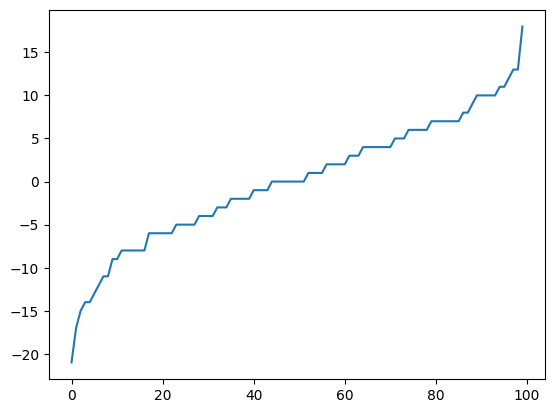

In [43]:
games = []

for j in range(100):
    game_scores = 0
    for i in range(100):
        action = get_action(s1)
        opponent_action = get_action(s2)
        game_scores += get_utility(action)[opponent_action]
    games.append(game_scores)

plt.plot(sorted(games))
print("Mean score:", np.mean(games), "Median score:", np.median(games))